## Clustering Analysis 

### 1. Data Exploration & Identification of Relevant Attributes
* Load the dataset and explore its structure.
* Examine the distribution of features.
* Check for missing values or outliers. Please specify the reasons if you decide to drop any data or variables.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# load the dataset
df = pd.read_csv("Wholesale customers data.csv", encoding = 'utf-8')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Data info in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Dimensions (rows, columns)
df.shape  

(440, 8)

In [6]:
# Summary statistics for numeric columns
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In total, the dataset consists of 8 columns and 440 rows. Each column has 440 data points, indicating no missing values. 

In [7]:
# drop channel and region columns for further analysis
columns_to_keep = ['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen']  
df_k = df[columns_to_keep]
df_k.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


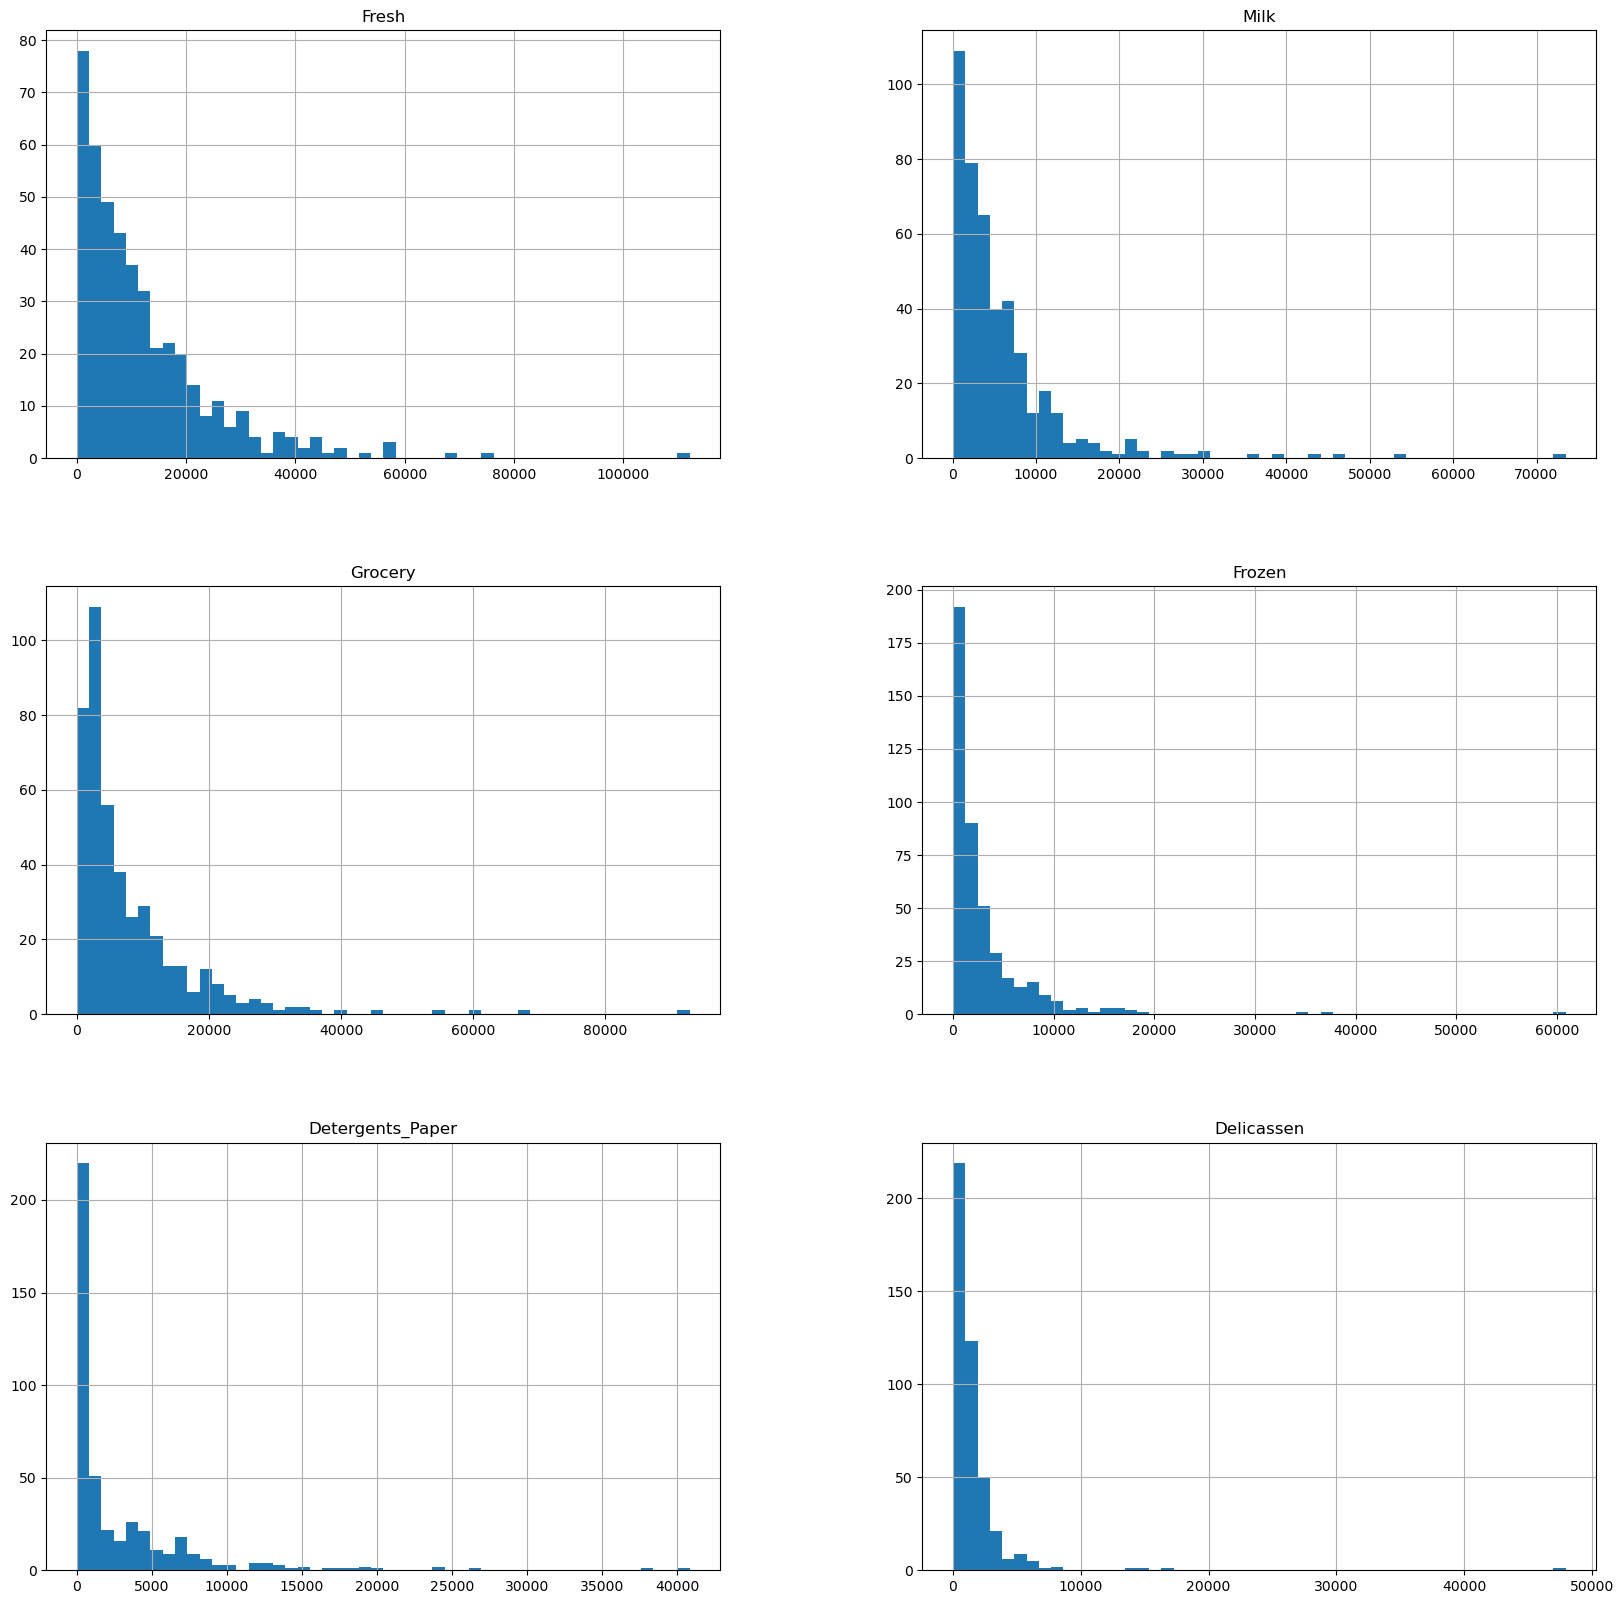

In [8]:
#histograms
df_k.hist(figsize = (20,20), bins= 50)
plt.show()

The observed distributions exhibit positive skewness, indicating that they are skewed towards the lower values with a concentration on the left side of the graph. This characteristic aligns with variables characterized by low means and variance.

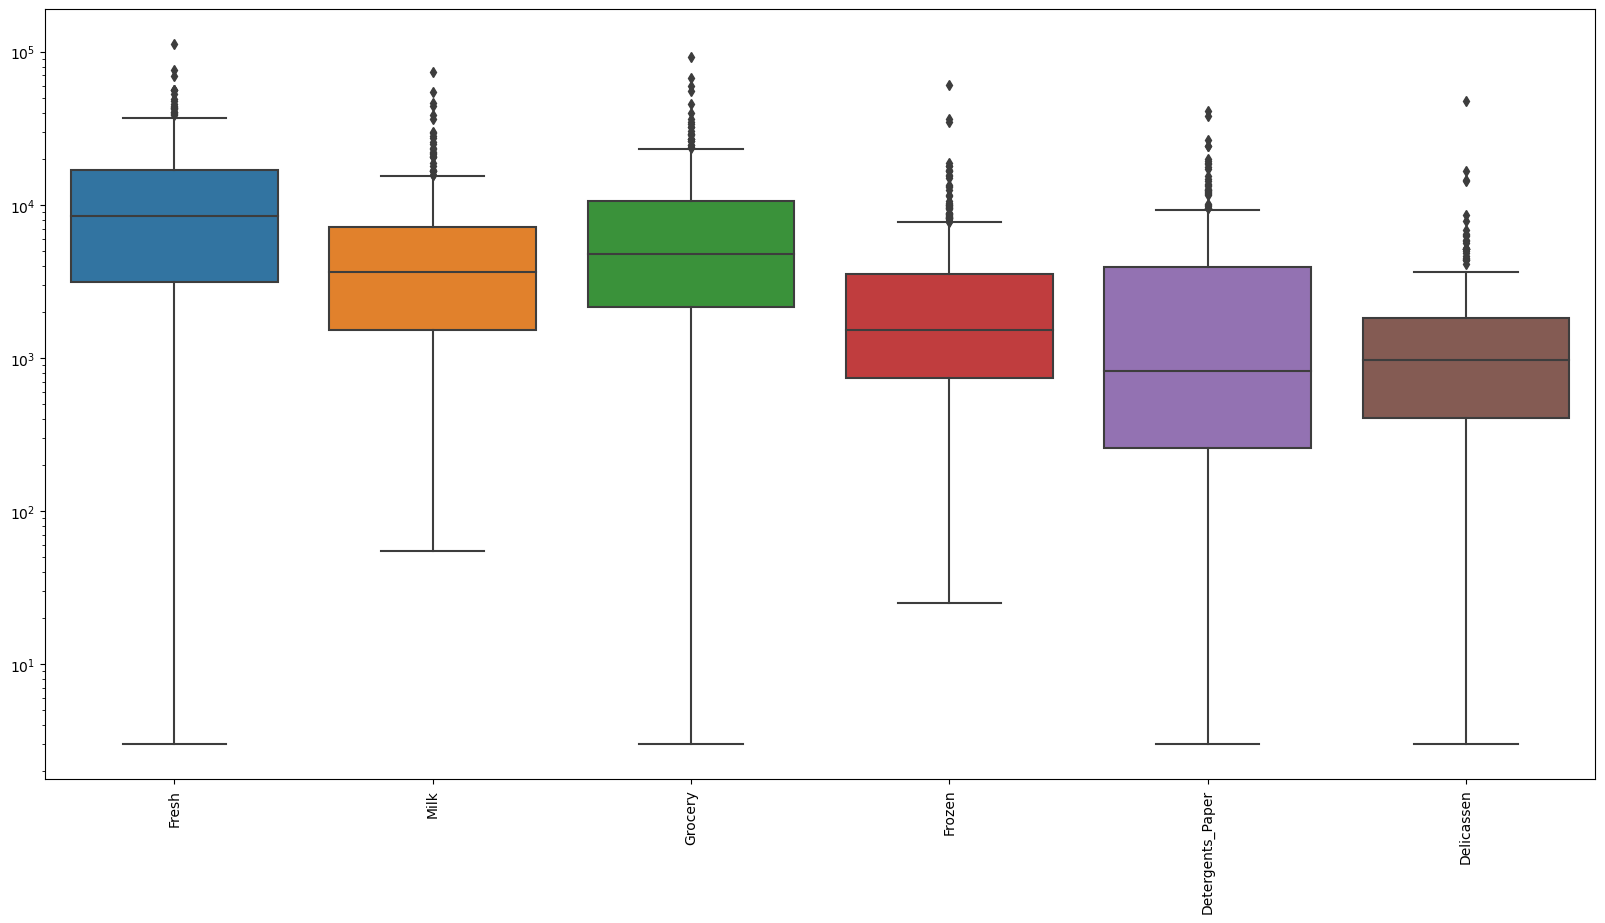

In [9]:
# boxplots
plt.figure(figsize=(20,10))
sns.boxplot(data = df_k)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

The upper and lower lines in the boxplot indicate the maximum and minimum values of each feature, respectively. Any points lying above the maximum line or below the minimum line are regarded as outliers. The box's span represents the interquartile range, illustrating the difference between the 75th and 25th percentiles of the observations. Additionally, the line within the box denotes the mean value for each feature.

Observing the boxplot reveals the presence of outliers across nearly all the features. However, after careful consideration and assuming that these outliers do not stem from human errors or measurement inaccuracies but rather signify distinct behaviors within the dataset, I have chosen not to modify or remove these outliers. Abruptly removing these outliers would not only substantially reduce the dataset but also likely result in losing crucial information required to discover meaningful insights from these specific patterns. 

### 2. Feature Scaling 
* Perform feature scaling if necessary to standardize the variables. 

K-Mean relys on distance calculations and is sensitive to the scale of features. Feature scaling is necessary in this case as it can significantly impact performance. Second, most features are in the same unit (m.u.). However, Channel and Region are categorical data. It's better to drop them for the K-Mean clustering analysis. 

In [10]:
scaler = StandardScaler()
df_scaled = df_k.copy()
df_scaled[columns_to_keep] = scaler.fit_transform(df_scaled[columns_to_keep])

In [11]:
df_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


### 3. K-means Clustering 
* Experiment with different values of K (number of clusters) and state the number of K of your choice. 
* Apply K-means clustering algorithm on the dataset.

/Users/xingewu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xingewu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xingewu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xingewu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

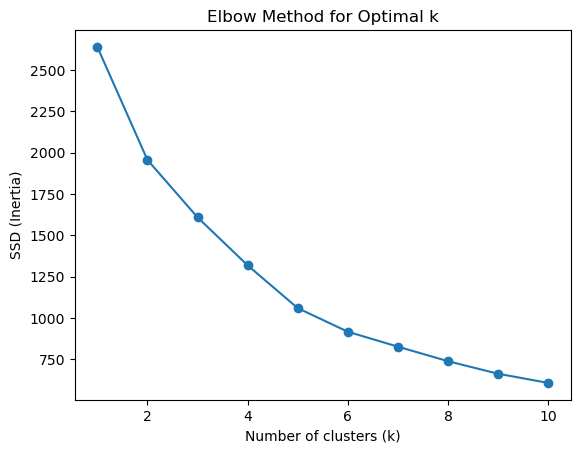

In [12]:
ssd = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSD (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

As the number of clusters increases, the inertia tends to decrease. However, beyond a certain point (point 5 in this case), the reduction in inertia becomes less pronounced for each additional cluster. This "elbow" represents this point where the rate of decrease in inertia starts to slow down significantly.

From the plot above, we can observe that the location of a slightly bend is between the number of clusters = 4 and the number of cluster = 6. Hence, the appropriate number of cluster is 5. 


In [13]:
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [14]:
#get cluster assignments 
cluster_assignments = kmeans.labels_

In [15]:
df_k['cluster'] = cluster_assignments

/var/folders/fh/2xnqcxfd2g54d5z12s_76lnh0000gn/T/ipykernel_75862/4127172609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['cluster'] = cluster_assignments


In [16]:
df_k.sort_values(by='cluster')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
270,4720,1032,975,5500,197,56,0
269,15218,258,1138,2516,333,204,0
267,20893,1222,2576,3975,737,3628,0
263,2153,1115,6684,4324,2894,411,0
...,...,...,...,...,...,...,...
315,1479,14982,11924,662,3891,3508,3
82,10362,9232,11009,737,3537,2342,3
304,161,7460,24773,617,11783,2410,3
306,6468,12867,21570,1840,7558,1543,3


### 4. Analysis and Interpretation
* Analyze and interpret the characteristics of each cluster in business language.

In [31]:
# Analyze and interpret the characteristics of each cluster
cluster_means = df_k.groupby('cluster').mean()
#cluster_sizes = df_k[['cluster']].value_counts()

In [32]:
cluster_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,9092.155556,2967.759259,3807.411111,2271.759259,989.814815,978.962963
1,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
2,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
3,5754.166667,10866.604167,16607.104167,1464.125000,7202.875000,1813.385417
4,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000


In [33]:
# Assuming df_k is your DataFrame and 'cluster' is the column based on which you are calculating value counts.
cluster_sizes = df_k[['cluster']].value_counts().reset_index()

# Renaming the columns for clarity
cluster_sizes.columns = ['Cluster', 'Size']

In [34]:
cluster_sizes

,Cluster,Size
0,0,270
1,3,96
2,2,63
3,1,10
4,4,1


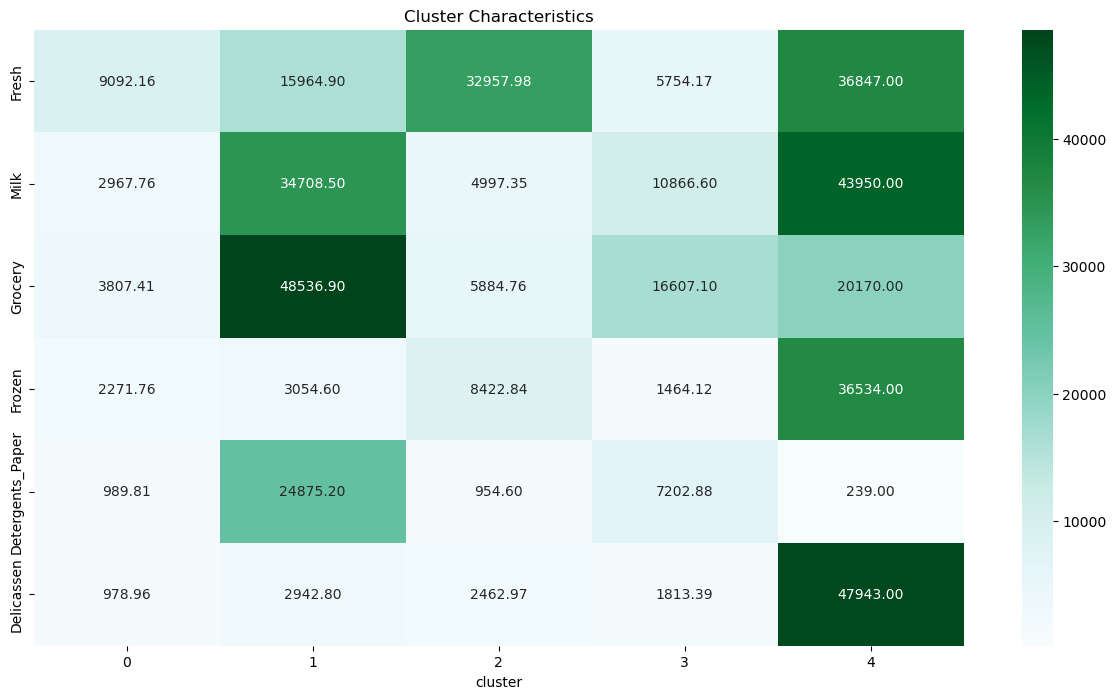

In [20]:
# Visualize the cluster characteristics
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='BuGn', fmt='.2f')
plt.title('Cluster Characteristics')
plt.show()

The heatmap representation divides our client base into five distinct segments based on their spending habits. Each segment varies in size, with Cluster 0 being the largest (270 customers), followed by Cluster 3 (96), Cluster 2 (63), Cluster 1 (10), and finally Cluster 4 (1).

Cluster 0, comprising the highest number of customers, exhibits spending habits generally below 10000 monetary units annually across all product categories. Notably, these customers prioritize fresh produce, groceries, and dairy items. This segment appears to be passionate about cooking fresh meals rather than opting for delicatessen or frozen foods. Crafting a customer profile for this segment highlights their culinary inclinations, enabling tailored marketing campaigns to encourage increased spending within their preferred categories.

Moving to Clusters 1 and 3, both segments display significant spending on groceries, dairy, and detergents_paper products. However, Cluster 1 customers spend notably more than those in Cluster 3. To retain customers in Cluster 1, enticing offers such as discounts could enhance loyalty. For Cluster 3 customers, offering showrooms or product samples might serve as an effective strategy to motivate future spending.

In Cluster 2, the primary expenditure revolves around fresh produce. Understanding this preference allows for tailored marketing strategies focused on encouraging continued spending or upselling within this category.

Although Cluster 4 contains only one customer, their substantial expenditure across various categories, except for detergents_paper, denotes high-value potential. Instead of emphasizing detergents_paper products, a personalized marketing approach, such as exclusive discounts or loyalty rewards, is essential to establish a strong connection with this customer. Implementing exclusive discounts or loyalty rewards tailored explicitly for this customer would communicate a sense of value and appreciation from the company. By recognizing their significant contributions and demonstrating personalized care, the company can foster a deeper relationship, encouraging continued loyalty and potentially increasing spending across various categories in the long term.

By analyzing the spending habits within each cluster, we can create nuanced customer profiles that enable the implementation of targeted marketing campaigns. Understanding customers' preferences and behaviors empowers us to strategize effectively, fostering increased engagement, loyalty, and spending within specific product categories.